# Project 3
## Team Members: Brian McKenna, Robby Bergers

### Objective:

The second project is to work with additional data types in assembly (floating point for example), Basic File IO and a Simple Image format (PPM in this case).  

### Task

1) Create a function F(X,Y,R,C,MaxIt) which returns 0 or a number less thanMaxIt in R0 according to the Normal Julia Set definition.  

X,Y are integers
R and C are floating point numbers
Maxit is an integer
2) Create a driving function (can be C) which takes in the size of the image, R and Cmin and Cmax and the number of images.ppm  and outputs a sequence of images numbered 1 to number of images.

3) Convert these images to PNG (or other format) to display in the Jupyter notebook.

How to get Started?

You might want to prototype the functions in C (or Java) and then convert them to assembly.  Top down design would be worthwhile.

Plans:

We will design this as a group.  You may work on it as a team and submit the same project multiple times provided you clearly identify the group members and what each person contributed.

In [2]:
!gcc PPM.c
!./a.out
!ls
!convert first.ppm first.png
!ls

a.out	       first2.ppm    first7.ppm    Hint3.ipynb		  PPM2.c
Desktop        first*-3.jpg  first*-8.jpg  Hint4.ipynb		  PPM.c
Downloads      first3.ppm    first8.ppm    main.c		  Public
F.c	       first*-4.jpg  first*-9.jpg  main.s		  spectral.c
first*-0.jpg   first4.ppm    first9.ppm    p1			  spectral.s
first0.ppm     first*-5.jpg  first.png	   P1 SUBMISSION.ipynb	  Test.png
first*-10.jpg  first5.ppm    first.ppm	   P2Sub.ipynb		  Test.ppm
first*-1.jpg   first*-6.jpg  F.s	   P2 Submission 2.ipynb  video.mov
first1.ppm     first6.ppm    Hint1.ipynb   P2 Submission.ipynb
first*-2.jpg   first*-7.jpg  Hint2.ipynb   P2 SUBMISSION.ipynb
/bin/sh: 1: convert: not found
a.out	       first2.ppm    first7.ppm    Hint3.ipynb		  PPM2.c
Desktop        first*-3.jpg  first*-8.jpg  Hint4.ipynb		  PPM.c
Downloads      first3.ppm    first8.ppm    main.c		  Public
F.c	       first*-4.jpg  first*-9.jpg  main.s		  spectral.c
first*-0.jpg   first4.ppm    first9.ppm    p1			  spectral.s
first0.ppm     firs

![alt text](first.png "Title")

## Next Steps
It might be nice to use diagrams in Jupyter, UML is the way to discuss designs so we can use
- http://plantuml.com/starting  
- and this https://github.com/jbn/IPlantUML


In [3]:
!sudo pip3 install iplantuml

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


In [4]:
!sudo apt install -y plantuml

Reading package lists... Done
Building dependency tree       
Reading state information... Done
plantuml is already the newest version (8039-1).
0 upgraded, 0 newly installed, 0 to remove and 232 not upgraded.


In [5]:
import iplantuml

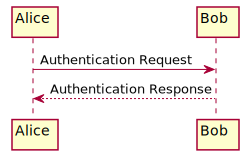

In [6]:


%%plantuml

@startuml
Alice -> Bob: Authentication Request
Bob --> Alice: Authentication Response
@enduml

## The above demonstrates that the install works.  
Need to import iplantuml beform the magic
Now lets create a Top down design of the project!!
http://plantuml.com/

We are going to use Work Breakdown

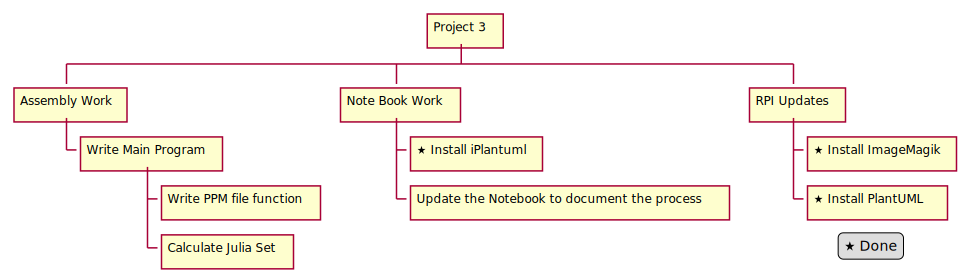

In [7]:
%%plantuml

@startwbs
* Project 3
** Assembly Work
*** Write Main Program
**** Write PPM file function
**** Calculate Julia Set
** Note Book Work
*** <&star> Install iPlantuml
*** Update the Notebook to document the process
** RPI Updates
*** <&star> Install ImageMagik
*** <&star> Install PlantUML  
legend right
  <&star> Done
endlegend
@endwbs

Bring in code for Floating Point vars

In [8]:
!cat F.c


#include <stdlib.h>
#include <stdio.h>
int F(int X,int Y,float R,float cx,float cy,int MaxIt);
void spectral_color(double *r,double *g,double *b,double l);

int F(int X,int Y,float R,float cx,float cy,int MaxIt)
{
	float zx = ((1.0*X)/511.)*2.*R-R;
	float zy = ((1.0*Y)/511.)*2.*R-R;
	float xtemp = 0.0;

	int iteration = 0;
	int max_iteration = MaxIt;

	while ( (zx * zx + zy * zy) < R*R) 
	{
		xtemp = zx * zx - zy * zy;
		zy = 2 * zx * zy  + cy; 
		zx = xtemp + cx;

		iteration = iteration + 1;
		if (iteration >= max_iteration) break;
	}

	if (iteration == max_iteration)
		return 0;
	else
		return iteration;
	
}


Compile floating point and main methods

In [9]:
!gcc F.c main.c spectral.c
!./a.out  -0.70176 -0.3842 4.0 100

!sudo rm -rf ~/.cache/chromium
!convert Test.ppm Test.png

cx = -0.701760,cy = -0.384200,R=4.000000 MaxIt=100/bin/sh: 1: convert: not found


View contents of directory and also run the executable a.out file

In [10]:
!gcc PPM2.c
!./a.out
!ls
!convert -quality 100 first*.ppm first*.jpg

a.out	       first2.ppm    first7.ppm    Hint3.ipynb		  PPM2.c
Desktop        first*-3.jpg  first*-8.jpg  Hint4.ipynb		  PPM.c
Downloads      first3.ppm    first8.ppm    main.c		  Public
F.c	       first*-4.jpg  first*-9.jpg  main.s		  spectral.c
first*-0.jpg   first4.ppm    first9.ppm    p1			  spectral.s
first0.ppm     first*-5.jpg  first.png	   P1 SUBMISSION.ipynb	  Test.png
first*-10.jpg  first5.ppm    first.ppm	   P2Sub.ipynb		  Test.ppm
first*-1.jpg   first*-6.jpg  F.s	   P2 Submission 2.ipynb  video.mov
first1.ppm     first6.ppm    Hint1.ipynb   P2 Submission.ipynb
first*-2.jpg   first*-7.jpg  Hint2.ipynb   P2 SUBMISSION.ipynb
/bin/sh: 1: convert: not found


Create slow moving jpg file from movie file

In [1]:
!ffmpeg -framerate 30 -i *.jpg contour.mov

ffmpeg version 3.2.10-1~deb9u1+rpt2 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 6.3.0 (Raspbian 6.3.0-18+rpi1+deb9u1) 20170516
  configuration: --prefix=/usr --extra-version='1~deb9u1+rpt2' --toolchain=hardened --libdir=/usr/lib/arm-linux-gnueabihf --incdir=/usr/include/arm-linux-gnueabihf --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libebur128 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxvid --enable-libzmq

View floating point code again for julia set

In [3]:
!cat F.c

#include <stdlib.h>
#include <stdio.h>
int F(int X,int Y,float R,float cx,float cy,int MaxIt);
void spectral_color(double *r,double *g,double *b,double l);

int F(int X,int Y,float R,float cx,float cy,int MaxIt)
{
	float zx = ((1.0*X)/511.)*2.*R-R;
	float zy = ((1.0*Y)/511.)*2.*R-R;
	float xtemp = 0.0;

	int iteration = 0;
	int max_iteration = MaxIt;

	while ( (zx * zx + zy * zy) < R*R) 
	{
		xtemp = zx * zx - zy * zy;
		zy = 2 * zx * zy  + cy; 
		zx = xtemp + cx;

		iteration = iteration + 1;
		if (iteration >= max_iteration) break;
	}

	if (iteration == max_iteration)
		return 0;
	else
		return iteration;
	
}


Ran into errors while trying to convert code for julia set floating point from c to assembly

In [4]:
!gcc -S F.c -mfpu=vfpv2
!cat F.s

gcc: error: unrecognized argument in option ‘-mfpu=vfpv2’
gcc: note: valid arguments to ‘-mfpu=’ are: crypto-neon-fp-armv8 fp-armv8 fpv4-sp-d16 fpv5-d16 fpv5-sp-d16 neon neon-fp-armv8 neon-fp16 neon-vfpv4 vfp vfp3 vfpv3 vfpv3-d16 vfpv3-d16-fp16 vfpv3-fp16 vfpv3xd vfpv3xd-fp16 vfpv4 vfpv4-d16
			.arch armv6
.data 
			
.text
F:   push {lr}
@ X is in R0
@ Y is in R1
@ MaxIt is in R2
@ S0 is R
  R .req s0
@ S1 is cx
@ S2 is cy

@ float zx = ((1.0*X)/511.)*2.*R-R;
@ shift x by 1  and put into S3
  zx .req s3
  
@ convert signed integer to float (this is an operation on S3)
@ divide by the floating point constant 511.
@ multiply by R
@ subtract R

@ Repeat for zy
@ float zy = ((1.0*Y)/511.)*2.*R-R; (put this in s11 if we want to vectorize)
    zy  .req s11

@   float xtemp = 0.0; 

@	int iteration = 0;
    iter .req r0
    sub iter,iter
    
@	int max_iteration = MaxIt;
    MaxIt .req r2
    
@  Recall zx is s3 and zy is s11
@   while ( (zx * zx + zy * zy) < R*R) 
    vmul.f32  R,R,R   @ R i

Compile floating point values

In [7]:
!as F.s -mfpu=vfpv2

In [8]:
!gcc F.s

/usr/lib/gcc/arm-linux-gnueabihf/6/../../../arm-linux-gnueabihf/crt1.o: In function `_start':
(.text+0x34): undefined reference to `main'
collect2: error: ld returned 1 exit status


Final call for the floating point values after edits

In [9]:
!cat F.s

			.arch armv6
.data 
			
.text
F:   push {lr}
@ X is in R0
@ Y is in R1
@ MaxIt is in R2
@ S0 is R
  R .req s0
@ S1 is cx
@ S2 is cy

@ float zx = ((1.0*X)/511.)*2.*R-R;
@ shift x by 1  and put into S3
  zx .req s3
  
@ convert signed integer to float (this is an operation on S3)
@ divide by the floating point constant 511.
@ multiply by R
@ subtract R

@ Repeat for zy
@ float zy = ((1.0*Y)/511.)*2.*R-R; (put this in s11 if we want to vectorize)
    zy  .req s11

@   float xtemp = 0.0; 

@	int iteration = 0;
    iter .req r0
    sub iter,iter
    
@	int max_iteration = MaxIt;
    MaxIt .req r2
    
@  Recall zx is s3 and zy is s11
@   while ( (zx * zx + zy * zy) < R*R) 
    vmul.f32  R,R,R   @ R is now squared
    vmul.f32  s4,zx,zx
    vmul.f32  s12,zy,zy
    vadd.f32  s4,s4,s12
    vcmp.f32  s4,R
    bge done
     
    
    
done:     pop  {pc}


In [10]:
!as F.s -mfpu=vfpv2